<a href="https://colab.research.google.com/github/mjiii25/prac_class/blob/main/PersonalProject_20183127MinjiSung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **서울 지역의 클러스터링(Clustering) 구역별 데이터 분석**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import math
from matplotlib import rcParams
import matplotlib.pyplot as plt
import string
from matplotlib import font_manager, rc
import datetime

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

## 서울 지역별 클러스터링

- 위도와 경도의 정보를 담고 있는 Region.csv 이용
- 위도와 경도를 이용해 서울 지역구를 몇 개의 클러스팅으로 구분

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Region= pd.read_csv('/content/drive/MyDrive/Region.csv') 

In [ ]:
df=Region[['province','city','latitude','longitude']] 
df=df[df.province=='서울']
df=df.drop(index=0)        

단, 모든 자치구가 포홤된 것은 아님! (구별 동향 분석에 큰 지장 없음)

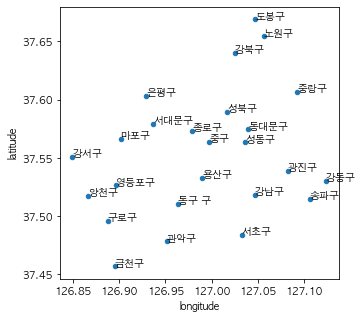

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
df.drop(columns='province').plot.scatter(x='longitude',y='latitude',ax=ax)
for ind in df.index:
    ax.annotate(df.loc[ind]['city'], (df.loc[ind]['longitude'], df.loc[ind]['latitude']))
    

클러스터링을 통해 서울 자치구를 여러 개의 구역으로 나눈다. 이를 위해 가장 널리 쓰이는 kmeans를 사용하고, 클러스터의 개수를 4로 설정한다.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,random_state=2020).fit(df[['longitude','latitude']])
labels=kmeans.labels_
centers=kmeans.cluster_centers_

클러스터링 후 각 구역이 [0,1,2,3] 중 하나로 할당된다.

In [ ]:
df['clustering']=labels
df.head(15)

,province,city,latitude,longitude,clustering
1,서울,강남구,37.518421,127.047222,0
2,서울,강동구,37.530492,127.123837,0
3,서울,강북구,37.639938,127.025508,2
4,서울,강서구,37.551166,126.849506,1
5,서울,관악구,37.478290,126.951502,1
6,서울,광진구,37.538712,127.082366,0
7,서울,구로구,37.495632,126.887650,1
8,서울,금천구,37.456852,126.895229,1
9,서울,노원구,37.654259,127.056294,2
10,서울,도봉구,37.668952,127.047082,2


클러스터링에 의한 지역구 구분을 명확하게 하기 위해 서로 다른 색으로 표시한다.

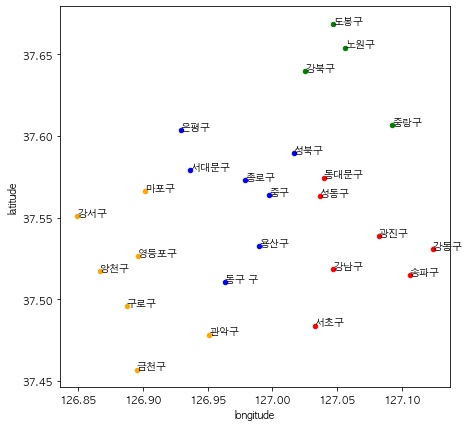

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))

df_temp=df[df['clustering']==0]
df_temp.plot.scatter(x='longitude',y='latitude',ax=ax,color='RED')

df_temp=df[df['clustering']==1]
df_temp.plot.scatter(x='longitude',y='latitude',ax=ax,color='Orange')

df_temp=df[df['clustering']==2]
df_temp.plot.scatter(x='longitude',y='latitude',ax=ax,color='Green')

df_temp=df[df['clustering']==3]
df_temp.plot.scatter(x='longitude',y='latitude',ax=ax,color='Blue')

for ind in df.index:
    ax.annotate(df.loc[ind]['city'], (df.loc[ind]['longitude'], df.loc[ind]['latitude']))

[0,1,2,3]이라는 라벨을 각 클러스터의 대표적인 지역구 이름으로 수정한다.

- 빨간색 - 강남구외
- 노랑색 - 강서구외
- 초록색 - 강북구외
- 파랑색 - 종로구외

In [ ]:
df.loc[:,'clustering']=df.clustering.replace([0,1,2,3],['강남구외','강서구외','강북구외','종로구외'])
df.head(20)

,province,city,latitude,longitude,clustering
1,서울,강남구,37.518421,127.047222,강남구외
2,서울,강동구,37.530492,127.123837,강남구외
3,서울,강북구,37.639938,127.025508,강북구외
4,서울,강서구,37.551166,126.849506,강서구외
5,서울,관악구,37.478290,126.951502,강서구외
6,서울,광진구,37.538712,127.082366,강남구외
7,서울,구로구,37.495632,126.887650,강서구외
8,서울,금천구,37.456852,126.895229,강서구외
9,서울,노원구,37.654259,127.056294,강북구외
10,서울,도봉구,37.668952,127.047082,강북구외


In [ ]:
region=df

# 전처리

In [ ]:
fpopl=pd.read_csv('/content/drive/MyDrive/fpopl.csv') #유동인구 데이터
card=pd.read_csv('/content/drive/MyDrive/card_20200717.csv') #카드 매출 데이터

## 전처리1 : 행정구역코드를 바탕으로 유동인구 및 카드 데이터에 대해 서울지역구 column 추가하기

fpopl과 pop 모두 행정구역 정보가 코드로만 나와있기 때문에 서울 지역구 column을 손수 알아낼 필요가 있다.

In [ ]:
fpopl.head()

,base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt
0,20200101,0,M,age_00,11650560,15
1,20200101,0,M,age_00,11590620,6
2,20200101,0,M,age_00,11560710,4
3,20200101,0,M,age_00,11470680,12
4,20200101,0,M,age_00,11350665,6


In [ ]:
card.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,1174066000,성내3동,7041,약국,463,5843230
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550
2,20200104,1174066000,성내3동,7021,한의원,53,4589800
3,20200104,1174066000,성내3동,7020,의원,339,9267240
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000


astrd_master.csv 파일을 통해 지역구 코드에 대한 정보를 파악할 수 있다.
앞 4자리가 서울지역의 구를 나타내므로 해당 코드와 대응하는 구를 파악한다.

In [ ]:
adstrd= pd.read_csv('/content/drive/MyDrive/adstrd_master.csv')
adstrd

,adstrd_code,adstrd_nm,brtc_nm,signgu_nm
0,11110515.0,청운효자동,서울특별시,종로구
1,11110530.0,사직동,서울특별시,종로구
2,11110540.0,삼청동,서울특별시,종로구
3,11110550.0,부암동,서울특별시,종로구
4,11110560.0,평창동,서울특별시,종로구
...,...,...,...,...
3488,50130580.0,서홍동,제주특별자치도,서귀포시
3489,50130590.0,대륜동,제주특별자치도,서귀포시
3490,50130600.0,대천동,제주특별자치도,서귀포시
3491,50130610.0,중문동,제주특별자치도,서귀포시


In [ ]:

signgu_unique=adstrd.loc[:,'signgu_nm'].unique()

def isNaN(num): # define discriminate the nan Value
    return num != num 

signgu_unique=[value for value in signgu_unique if not isNaN(value)]
signgu_code=pd.DataFrame(np.full([len(signgu_unique),2],None),columns=['signgu_nm','code'])


for i in signgu_code.index:
    signgu=adstrd[adstrd.loc[:,'signgu_nm']==signgu_unique[i]] # extract brtc_nm
    code=signgu.iloc[0]['adstrd_code']
    first4=int(str(code)[:4])
    signgu_code.loc[i]=[signgu_unique[i],first4]#

signgu_code에 지역구와 이에 대응하는 코드가 저장되었음을 확인할 수 있다.

In [ ]:
signgu_code.head()

,signgu_nm,code
0,종로구,1111
1,중구,1114
2,용산구,1117
3,성동구,1120
4,광진구,1121


signgu_code를 이용하여 signgu_nm column을 추가한다.


In [ ]:
first4=fpopl.loc[:,'adstrd_code'].apply(lambda x: int(str(x)[:4]))
fpopl['signgu_nm']=first4.replace(signgu_code.code.values,signgu_code.signgu_nm.values)

In [ ]:
first4=card.loc[:,'adstrd_code'].apply(lambda x: int(str(x)[:4]))
card['signgu_nm']=first4.replace(signgu_code.code.values,signgu_code.signgu_nm.values)

결과적으로, fpopl과 card 각각의 data들이 어떤 구에 대한 정보인지를 파악할 수 있게 된다.

In [ ]:
fpopl.head()

,base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt,signgu_nm
0,20200101,0,M,age_00,11650560,15,서초구
1,20200101,0,M,age_00,11590620,6,동작구
2,20200101,0,M,age_00,11560710,4,영등포구
3,20200101,0,M,age_00,11470680,12,양천구
4,20200101,0,M,age_00,11350665,6,노원구


In [ ]:
card.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,signgu_nm
0,20200104,1174066000,성내3동,7041,약국,463,5843230,강동구
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550,강동구
2,20200104,1174066000,성내3동,7021,한의원,53,4589800,강동구
3,20200104,1174066000,성내3동,7020,의원,339,9267240,강동구
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000,강동구


## _전처리2 : 데이터 형식 가공하기_

두 데이터 모두 날짜 형식을 8자리 숫자로 표기했는데, 이를 날짜 형식으로 바꾸고자 한다.

** card의 경우, 매출(salamt) 부분이 string형으로 되어있으므로 이를 수치 데이터로 변환한다. 단어 데이터의 경우 0으로 처리한다.

In [ ]:
fpopl.head()

,base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt,signgu_nm
0,20200101,0,M,age_00,11650560,15,서초구
1,20200101,0,M,age_00,11590620,6,동작구
2,20200101,0,M,age_00,11560710,4,영등포구
3,20200101,0,M,age_00,11470680,12,양천구
4,20200101,0,M,age_00,11350665,6,노원구


In [ ]:
card.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,signgu_nm
0,20200104,1174066000,성내3동,7041,약국,463,5843230,강동구
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550,강동구
2,20200104,1174066000,성내3동,7021,한의원,53,4589800,강동구
3,20200104,1174066000,성내3동,7020,의원,339,9267240,강동구
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000,강동구


In [ ]:
def my_datetime(date):
    return pd.Timestamp(str(date)).date()

fpopl.base_ymd=fpopl.base_ymd.map(my_datetime)
card.receipt_dttm=card.receipt_dttm.map(my_datetime)

In [ ]:
def to_numeric(string):
    if string.isnumeric():
        return int(string)
    else :
        return 0

card.salamt=card.salamt.map(to_numeric)

## 전처리3 : 클러스터링 라벨 붙이기

전처리 과정 전에 완성된 클러스터링을 해당 데이터에 적용한다.

In [ ]:
fpopl['clustering']=fpopl.signgu_nm.replace(region.city.values,region.clustering.values)
card['clustering']=card.signgu_nm.replace(region.city.values,region.clustering.values)

In [ ]:
fpopl.head()

,base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt,signgu_nm,clustering
0,2020-01-01,0,M,age_00,11650560,15,서초구,강남구외
1,2020-01-01,0,M,age_00,11590620,6,동작구,동작구
2,2020-01-01,0,M,age_00,11560710,4,영등포구,강서구외
3,2020-01-01,0,M,age_00,11470680,12,양천구,강서구외
4,2020-01-01,0,M,age_00,11350665,6,노원구,강북구외


In [ ]:
card.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,signgu_nm,clustering
0,2020-01-04,1174066000,성내3동,7041,약국,463,5843230,강동구,강남구외
1,2020-01-04,1174066000,성내3동,7022,치과의원,33,7835550,강동구,강남구외
2,2020-01-04,1174066000,성내3동,7021,한의원,53,4589800,강동구,강남구외
3,2020-01-04,1174066000,성내3동,7020,의원,339,9267240,강동구,강남구외
4,2020-01-04,1174066000,성내3동,6110,자동차정비,19,4441000,강동구,강남구외


# 구역별 시각화

- 왼쪽위부터 시계방향으로 '종로구외', '강북구외', '강서구외', '강남구외'로 표시
- 유동인구 및 매출에서 주말과 평일의 수치가 큰 차이를 보이는 점을 보완하기 위해 최근 7일 동안의 평균값으로 수치 표시



Text(0, 0.5, '유동 인구')

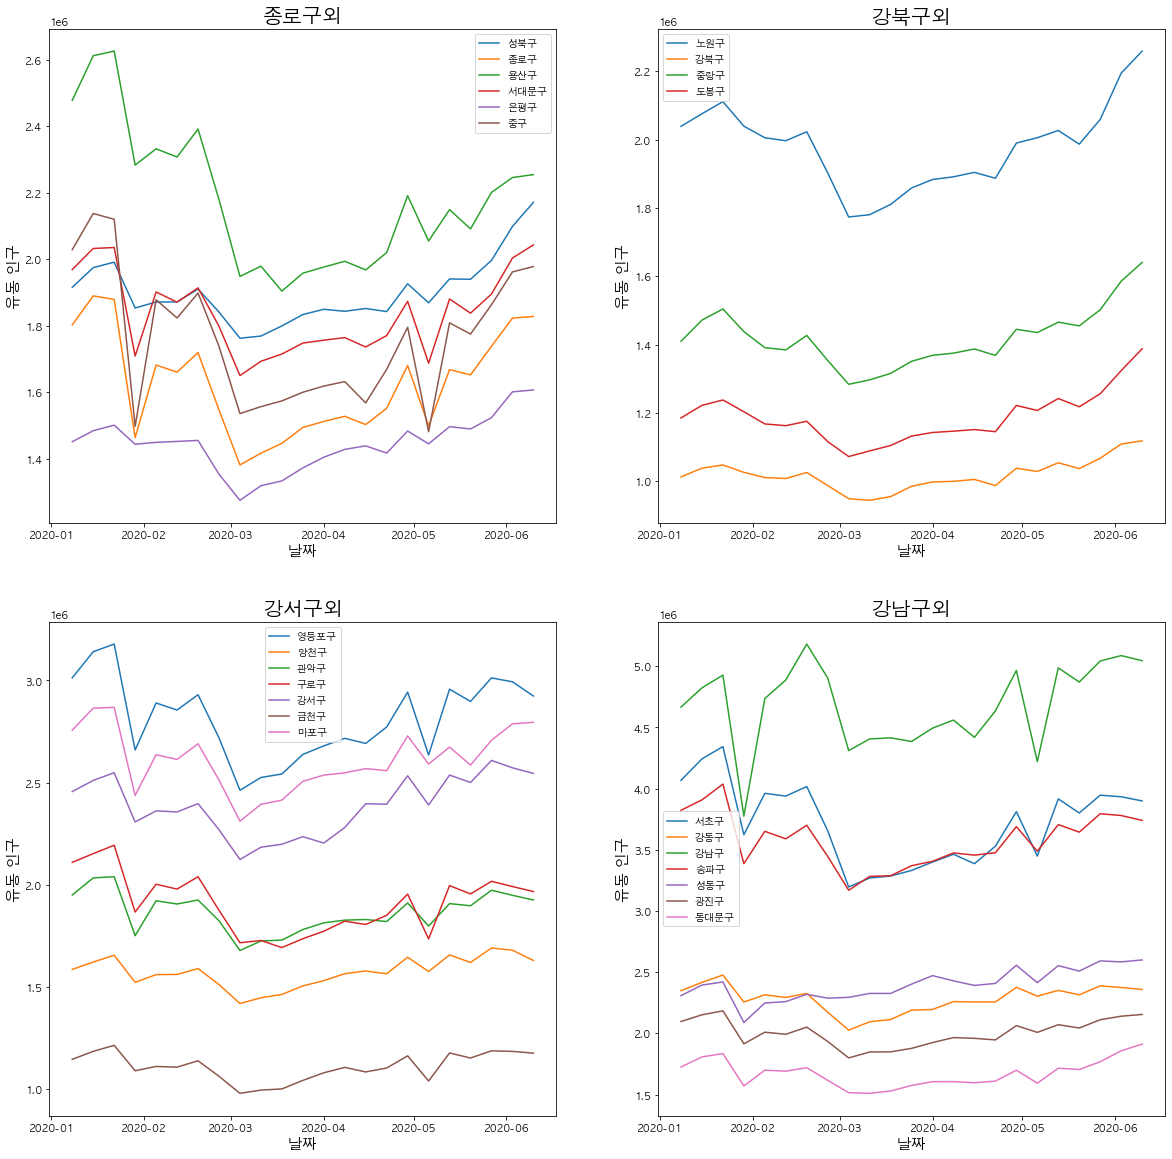

In [ ]:
fig,axs=plt.subplots(2,2,figsize=(20,20))

fpopl_gangnams=fpopl[fpopl.clustering=='강남구외']
grouped_gangnams=fpopl_gangnams.drop(columns=['tmzon_se_code','adstrd_code']).groupby(['signgu_nm','base_ymd']).sum()
for gu in fpopl_gangnams.signgu_nm.unique():
    grouped_gangnams.loc[gu,:].rolling(window=7).mean()[::7].plot(ax=axs[1,1])
axs[1,1].legend(fpopl_gangnams.signgu_nm.unique())

axs[1,1].set_title('강남구외',fontsize=20)
axs[1,1].set_xlabel('날짜',fontsize=15)
axs[1,1].set_ylabel('유동 인구',fontsize=15)


fpopl_gangseos=fpopl[fpopl.clustering=='강서구외']
grouped_gangseos=fpopl_gangseos.drop(columns=['tmzon_se_code','adstrd_code']).groupby(['signgu_nm','base_ymd']).sum()
for gu in fpopl_gangseos.signgu_nm.unique():
    grouped_gangseos.loc[gu,:].rolling(window=7).mean()[::7].plot(ax=axs[1,0])
axs[1,0].legend(fpopl_gangseos.signgu_nm.unique())

axs[1,0].set_title('강서구외',fontsize=20)
axs[1,0].set_xlabel('날짜',fontsize=15)
axs[1,0].set_ylabel('유동 인구',fontsize=15)



fpopl_gangbuks=fpopl[fpopl.clustering=='강북구외']
grouped_gangbuks=fpopl_gangbuks.drop(columns=['tmzon_se_code','adstrd_code']).groupby(['signgu_nm','base_ymd']).sum()
for gu in fpopl_gangbuks.signgu_nm.unique():
    grouped_gangbuks.loc[gu,:].rolling(window=7).mean()[::7].plot(ax=axs[0,1])
axs[0,1].legend(fpopl_gangbuks.signgu_nm.unique())

axs[0,1].set_title('강북구외',fontsize=20)
axs[0,1].set_xlabel('날짜',fontsize=15)
axs[0,1].set_ylabel('유동 인구',fontsize=15)

fpopl_jongnos=fpopl[fpopl.clustering=='종로구외']
grouped_jongnos=fpopl_jongnos.drop(columns=['tmzon_se_code','adstrd_code']).groupby(['signgu_nm','base_ymd']).sum()
for gu in fpopl_jongnos.signgu_nm.unique():
    grouped_jongnos.loc[gu,:].rolling(window=7).mean()[::7].plot(ax=axs[0,0])
axs[0,0].legend(fpopl_jongnos.signgu_nm.unique())

axs[0,0].set_title('종로구외',fontsize=20)
axs[0,0].set_xlabel('날짜',fontsize=15)
axs[0,0].set_ylabel('유동 인구',fontsize=15)

### 분석 및 해석

: 코로나19의 확산속도가 본격적으로 시작되었던 2월 말을 기준으로 서울 전지역이 침체되었다는 점이 뚜렷하게 관찰된다. 하지만, 거의 모든 클러스터에서 3월 이후로 유동인구가 점점 회복이 되어가는 모습을 보여주고 있다. '강서구외', '강북구외' 그리고 '강남구외' 지역은 6월에 코로나19 유행 이전의 수준을 갖게 되었지만, '종로구외' 지역은 아직 그 이전의 상태로 회복하지 못하고 있는 것으로 파악된다. 특히, '강북구외' 지역은 코로나19 유행 이후 오히려 유동인구가 늘어났다는 것을 확인할 수 있다.

### 카드 매출 시각화
: 구역별 및 날짜별 카드 매출 시각화 (전 업종 합계)

Text(0, 0.5, '카드 매출')

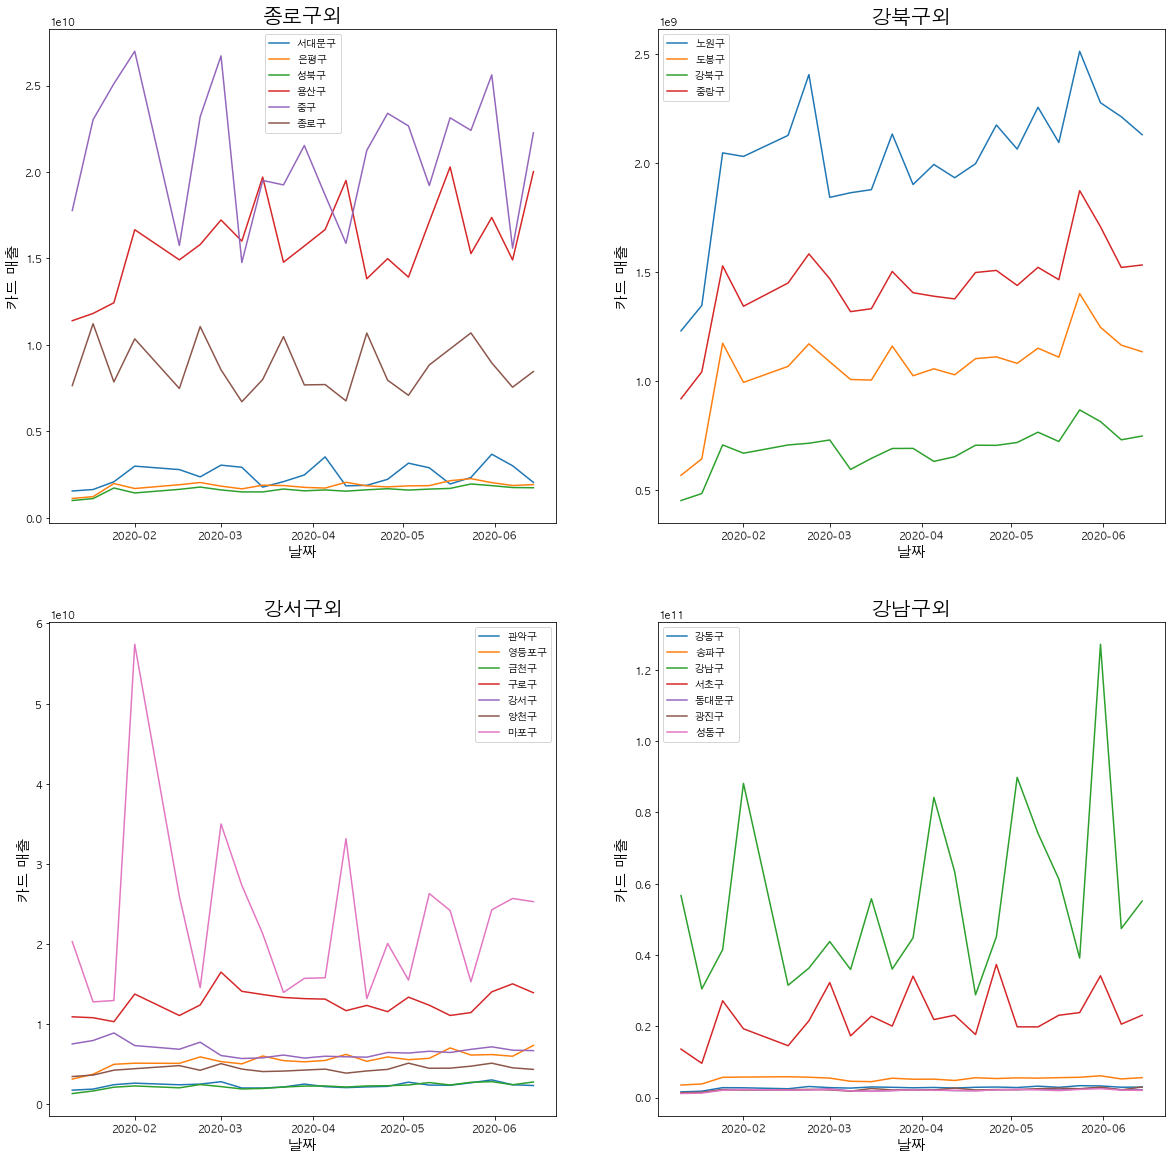

In [ ]:
fig,axs=plt.subplots(2,2,figsize=(20,20))

card_gangnams=card[card.clustering=='강남구외']
grouped_gangnams=card_gangnams.drop(columns=['mrhst_induty_cl_code','adstrd_code']).groupby(['signgu_nm','receipt_dttm']).sum()
for gu in card_gangnams.signgu_nm.unique():
    grouped_gangnams.loc[gu,:].rolling(window=7).mean()[::7].plot(ax=axs[1,1],rot=True)
axs[1,1].legend(card_gangnams.signgu_nm.unique())

axs[1,1].set_title('강남구외',fontsize=20)
axs[1,1].set_xlabel('날짜',fontsize=15)
axs[1,1].set_ylabel('카드 매출',fontsize=15)


card_gangseos=card[card.clustering=='강서구외']
grouped_gangseos=card_gangseos.drop(columns=['mrhst_induty_cl_code','adstrd_code']).groupby(['signgu_nm','receipt_dttm']).sum()
for gu in card_gangseos.signgu_nm.unique():
    grouped_gangseos.loc[gu,:].rolling(window=7).mean()[::7].plot(ax=axs[1,0],rot=True)
axs[1,0].legend(card_gangseos.signgu_nm.unique())

axs[1,0].set_title('강서구외',fontsize=20)
axs[1,0].set_xlabel('날짜',fontsize=15)
axs[1,0].set_ylabel('카드 매출',fontsize=15)

card_gangbuks=card[card.clustering=='강북구외']
grouped_gangbuks=card_gangbuks.drop(columns=['mrhst_induty_cl_code','adstrd_code']).groupby(['signgu_nm','receipt_dttm']).sum()
for gu in card_gangbuks.signgu_nm.unique():
    grouped_gangbuks.loc[gu,:].rolling(window=7).mean()[::7].plot(ax=axs[0,1],rot=True)
axs[0,1].legend(card_gangbuks.signgu_nm.unique())
axs[0,1].set_title('강북구외',fontsize=20)
axs[0,1].set_xlabel('날짜',fontsize=15)
axs[0,1].set_ylabel('카드 매출',fontsize=15)

card_jongnos=card[card.clustering=='종로구외']
grouped_jongnos=card_jongnos.drop(columns=['mrhst_induty_cl_code','adstrd_code']).groupby(['signgu_nm','receipt_dttm']).sum()
for gu in card_jongnos.signgu_nm.unique():
    grouped_jongnos.loc[gu,:].rolling(window=7).mean()[::7].plot(ax=axs[0,0],rot=True)
axs[0,0].legend(card_jongnos.signgu_nm.unique())
axs[0,0].set_title('종로구외',fontsize=20)
axs[0,0].set_xlabel('날짜',fontsize=15)
axs[0,0].set_ylabel('카드 매출',fontsize=15)

### 분석 및 해석

: 카드 매출이 대부분의 지역에서 큰 폭으로 변화하고 있음을 확인할 수 있다. 하지만, 이와 같은 현상이 코로나19로 인해 발생하는지의 여부는 명확하게 파악하기 어렵다.
 코로나19의 1차 대유행이 일어났던 3월 직후에는 많은 지역구에서 매출 감소를 경험한 것으로 보인다. 이러한 추세는 4월에 들어서 다시 회복되는 모습을 보여주고 있으며, 심지어 '강북구외'와 '강남구외' 지역에서는 6월달에 들어서 코로나19 유행 이전 시기보다 더 많은 카드 매출을 기록하고 있기도 하다. 이러한 점으로 미루어봤을 때, 코로나19가 전체 업종의 매출에 큰 타격을 줬다고 단정짓는 데에는 한계가 있다.